In [9]:
import pandas as pd
import numpy as np

url = 'archive (2)/household_power_consumption.csv'
df = pd.read_csv(url)

print(df.info())
round(df.describe(),2)
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB
None


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


Preprocessing of the dataset

In [10]:
from datetime import datetime

# Since the dates are in irregular form, convert these dates to dd/mm/yyyy form:
# Function to convert date to the desired format
def convert_to_full_year(date_str):
    try:
        parsed_date = datetime.strptime(date_str, '%d/%m/%y')
        converted_date = parsed_date.strftime('%d/%m/%Y')

        return converted_date
    except ValueError:
        return date_str


df['Date'] = df['Date'].apply(convert_to_full_year)

print(df.head())

   index        Date     Time Global_active_power Global_reactive_power  \
0      0  01/01/2007  0:00:00                2.58                 0.136   
1      1  01/01/2007  0:01:00               2.552                   0.1   
2      2  01/01/2007  0:02:00                2.55                   0.1   
3      3  01/01/2007  0:03:00                2.55                   0.1   
4      4  01/01/2007  0:04:00               2.554                   0.1   

  Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0  241.97             10.6              0              0             0.0  
1  241.75             10.4              0              0             0.0  
2  241.64             10.4              0              0             0.0  
3  241.71             10.4              0              0             0.0  
4  241.98             10.4              0              0             0.0  


Visualisations

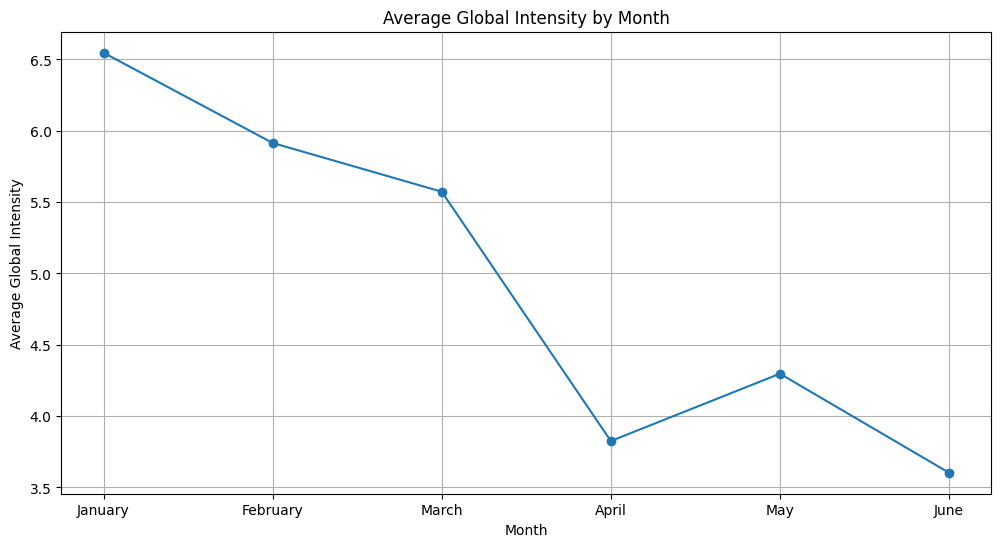

In [11]:
import matplotlib.pyplot as plt

# Making a graph for visualising Global Intensity for every month
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month

df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
monthly_avg_intensity = df.groupby('Month')['Global_intensity'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global Intensity (amps)')
plt.title('Average Global Intensity by Month')
plt.grid(True)
plt.show()

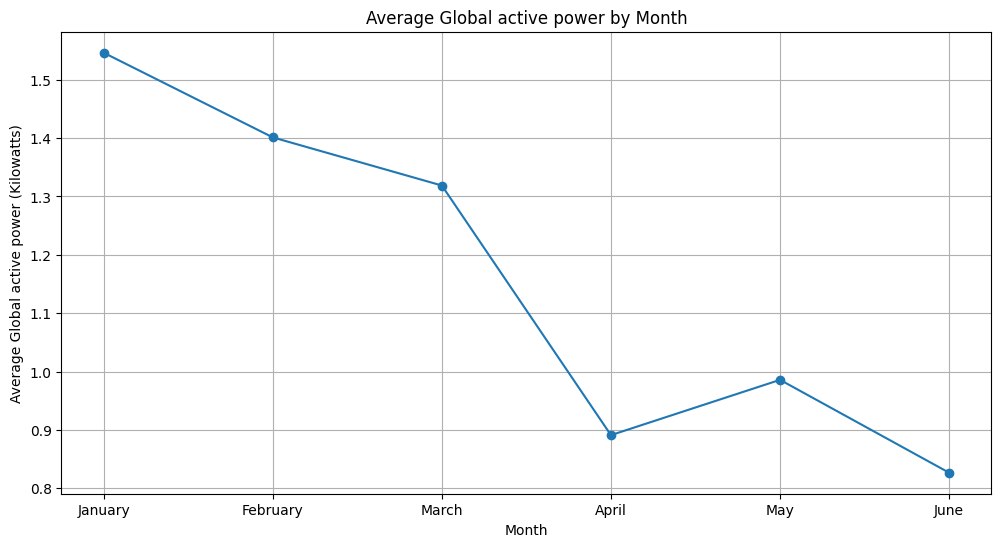

In [13]:
# Making a graph for visualising Global Intensity for every month
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
monthly_avg_intensity = df.groupby('Month')['Global_active_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global active power (Kilowatts)')
plt.title('Average Global active power by Month')
plt.grid(True)
plt.show()

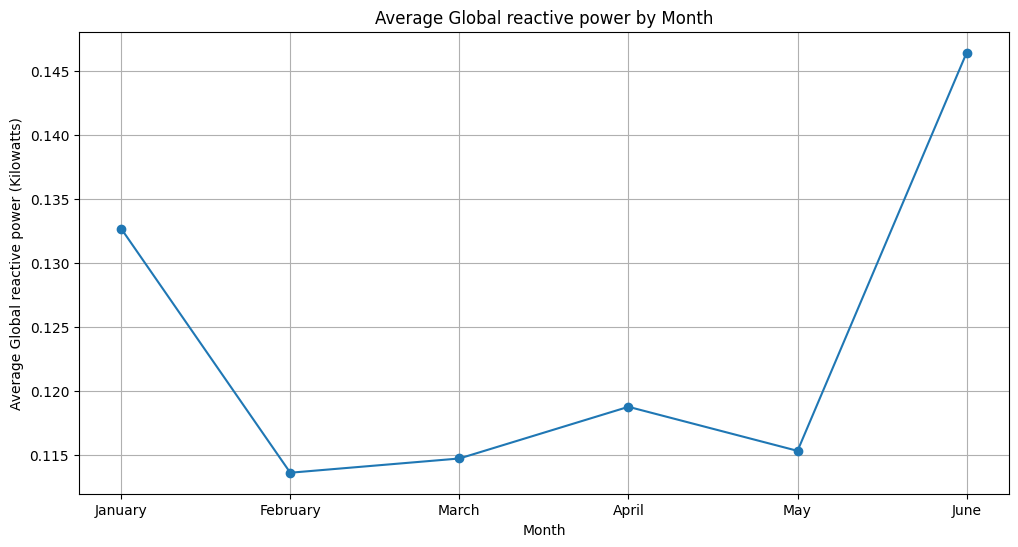

In [14]:
# Making a graph for visualising Global Intensity for every month
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month

df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
monthly_avg_intensity = df.groupby('Month')['Global_reactive_power'].mean()

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

plt.figure(figsize=(12, 6))
plt.plot(month_names, monthly_avg_intensity, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Global reactive power (Kilowatts)')
plt.title('Average Global reactive power by Month')
plt.grid(True)
plt.show()